In [1]:
import numpy as np
from dipy.viz import window, actor
from dipy.data import fetch_bundles_2_subjects, read_bundles_2_subjects
from dipy.tracking.streamline import transform_streamlines

import matplotlib.pyplot as plt
from matplotlib import cm

import json

%matplotlib inline

/Users/richford/miniconda3/envs/nipy-dipy/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
with open("../data/raw/core_streamlines.json") as fp:
    cores = json.load(fp)

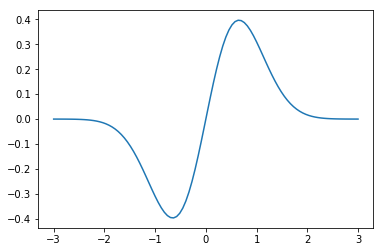

In [3]:
x = np.linspace(-3, 3, 100)
colors = np.exp(-np.square(x)) * np.sin(x)
plt.plot(x, colors)
colors = np.hstack()

In [5]:
renderer = window.Renderer()

bundle_names = ["Left Corticospinal", "Right Corticospinal"]
bundles = [np.array(cores[bn]["coreFiber"]) for bn in bundle_names]
stream_actor = actor.line(
    lines=bundles,
    colors=actor.create_colormap(colors, name='coolwarm'),
    linewidth=20,
    spline_subdiv=300,
    fake_tube=True,
)
renderer.add(stream_actor)
window.show(renderer, size=(900, 900), reset_camera=True)

In [ ]:
renderer.clear()
show_m = window.ShowManager(renderer, size=(1200, 900))
show_m.initialize()